In [1]:
import numpy as np
from sparseSampling import sparseSampling
from EISGame import EISGame
from valueIteration import valueIteration
from discretizer import discretizer
from EIS import SLModel
import pprint
import matplotlib.pyplot as plt
import copy

In [2]:
def sortedDictionary(dictionary):
    lists = sorted(dictionary.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    return x,y

In [ ]:
# Parameters
Rmax = 1.5
epsilon = 0.5
gamma = 0.8
stateRange = [-1,1]
numIntervals = 2000
C = 30
H = 2
EISIterations = 5
N0 = 20
# v.V

In [ ]:
# Run Value Iteration
nValueIteration = 40
d = discretizer(stateRange,numIntervals)
g = EISGame()
v = valueIteration(G=g,stateRange=[-1,1],numInterval=numIntervals,C=C,gamma=gamma,discretizer=d)
vStore = [{}] * nValueIteration
for i in range(0,nValueIteration):
    v.nextIteration()
    vStore[i] = v.V

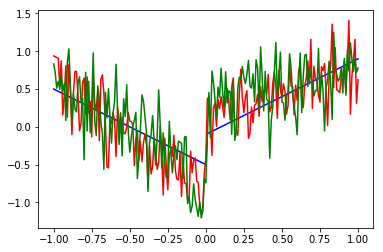

In [27]:
# for i in range(0,nValueIteration,19):
#     x,y = sortedDictionary(vStore[i])
#     plt.plot(x,y)
x1,y1 = sortedDictionary(vStore[0])
x2,y2 = sortedDictionary(vStore[5])
x3,y3 = sortedDictionary(vStore[39])
plt.plot(x1,y1, color= 'blue')
plt.plot(x2,y2,color = 'red')
plt.plot(x3,y3, color= 'green')
plt.show()

In [ ]:
# Building EIS
model = None
slModel = SLModel(d)
valueEIS = [{}] * EISIterations
for t in range(0,EISIterations): # run for t iterations
    g = EISGame() # Intialize a new game each round
    Nt = np.ceil(N0*(1.2)**(t)*np.log(N0*1.2**t))
    Nt = int(Nt)
    data = [(0,0)]*Nt
    print("Progress Round {} of {}".format(t+1,EISIterations))
    print ("Sampling {} points this round".format(Nt))
    for k in range(0,Nt):
        # print("Sampled {} of {} points".format(k+1,Nt), end="\r", flush=True)
        s = sparseSampling(gamma=gamma,G = g,Rmax = Rmax, epsilon = epsilon,model = model ) # Explore
        s.H = H
        s.C = C
        sampledState =  np.random.uniform(-1,1)
        if sampledState <= 0: # Improve
            V = min(s.estimateQ(s.H,sampledState,turn=1)) # player 2
        else:
            V = max(s.estimateQ(s.H,sampledState, turn=0)) # player 1
        data[k]=(sampledState,V) # Generate Data
    model = slModel
    model.updateValues(data)
#     print(t)
    valueEIS[t] = copy.deepcopy(model.V)
#     pprint.pprint(model.V)
    x,y = sortedDictionary(model.V)
    xValIter,yValIter = sortedDictionary(v.V)
    plt.scatter(yValIter,y)
    plt.scatter(yValIter,yValIter,color='r',alpha=0.3)
    plt.text(0.3,-0.5, 'Red is expected plot \n as t -> infinity', bbox=dict(facecolor=None, alpha=0.5))    
    plt.xlabel("V*_Hat")
    plt.ylabel("V*_EIS")
    plt.xlim([-1,1.5])
    plt.ylim([-1,1.5])
    plt.title("ValueIteration_V* vs EIS_V* " + "Iteration Number: "+ str(t))
    plt.show()
    if t >= 1: # Plots average difference in v*_EIS in every successive iteration
        meanDiff = [0]*t
        for counter in range(0,t):
            x1,y1 = sortedDictionary(valueEIS[counter])
            x2,y2 = sortedDictionary(valueEIS[counter+1])
            meanDiff[counter] = np.mean(np.subtract(y2,y1))
#             print(np.subtract(y2,y1))
        plt.plot(list(range(1,t+1,1)),meanDiff)
        plt.title("Average difference in V between iterations of EIS")
        plt.xlabel("Iteration Number t")
        plt.ylabel("Average diffence between iteration t+1 and t")
#         plt.ylim(-0.1,0.1) # Adjust accordingly
        plt.show()
    
    #Nt = Nt*(1.2)**(t+1)*np.log(Nt*1.2**t)
    
    

The starting state is 0.699495492134
Progress Round 1 of 5
Sampling 60 points this round


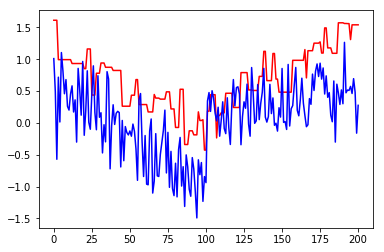

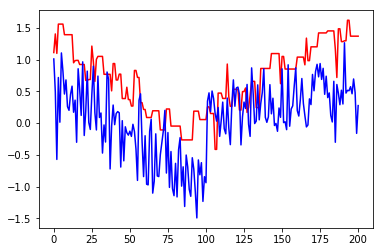

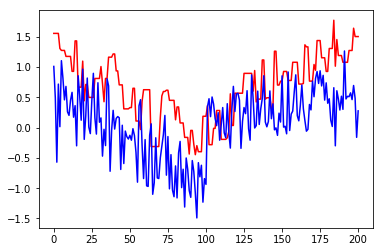

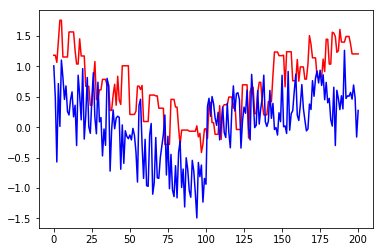

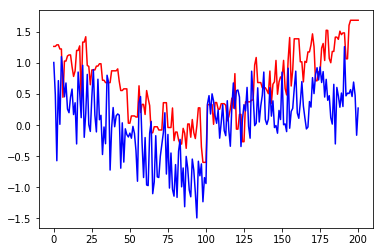

In [19]:
## plot V(EIS)
for i in range(0,EISIterations):
    x,y = sortedDictionary(valueEIS[i])
    plt.plot(y,color='red')
    xValIter,yValIter = sortedDictionary(v.V)
    plt.plot(yValIter,color='blue')
#     plt.ylim([-0.75,1.3])
    plt.show()
## plot |V(EIS)-V^*|
#error = [0]*EISIterations
#for t in range(0,EISIterations):
#    error[t] = max(abs(valueEIS[t].values()-v.V.values())

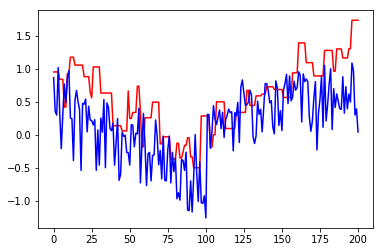

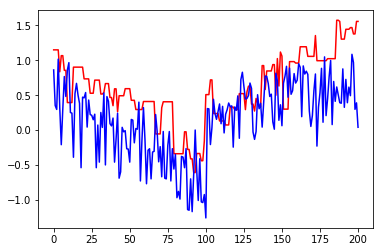

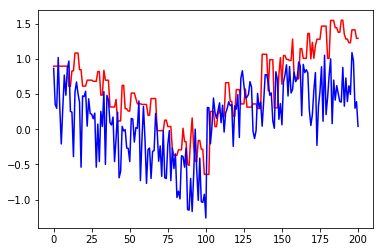

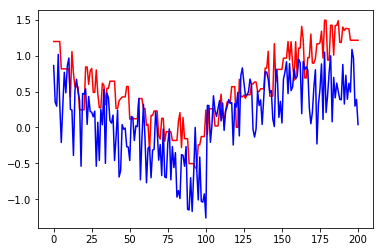

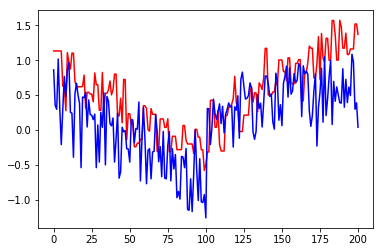

In [24]:
## plot V(EIS)
for i in range(0,EISIterations):
    x,y = sortedDictionary(valueEIS[i])
    plt.plot(y,color='red')
    xValIter,yValIter = sortedDictionary(v.V)
    plt.plot(yValIter,color='blue')
#     plt.ylim([-0.75,1.3])
    plt.show()
## plot |V(EIS)-V^*|
#error = [0]*EISIterations
#for t in range(0,EISIterations):
#    error[t] = max(abs(valueEIS[t].values()-v.V.values())